In [1]:
from IPython.display import display, HTML
from __future__ import print_function
import pandas as pd
import numpy as np
import requests
import plotly.express as px
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
import folium

<h1 style='text-align: center;'> COVID-19 Interactive Analysis Dashboard 

## What is COVID-19 ?
COVID-19 is a disease caused by the coronavirus SARS-CoV-2. It affects your lungs, airways and other organs. Coronaviruses are a large and diverse family of viruses that cause illnesses such as the common cold. Other recent diseases caused by coronaviruses include severe acute respiratory syndrome (SARS) and Middle East respiratory syndrome (MERS).
SARS-CoV-2 was first recognised in China and likely originated in animals. It is still unclear how the virus came to infect humans. The disease spread to other countries, with the World Health Organization (WHO) declaring a pandemic on 11 March 2020.

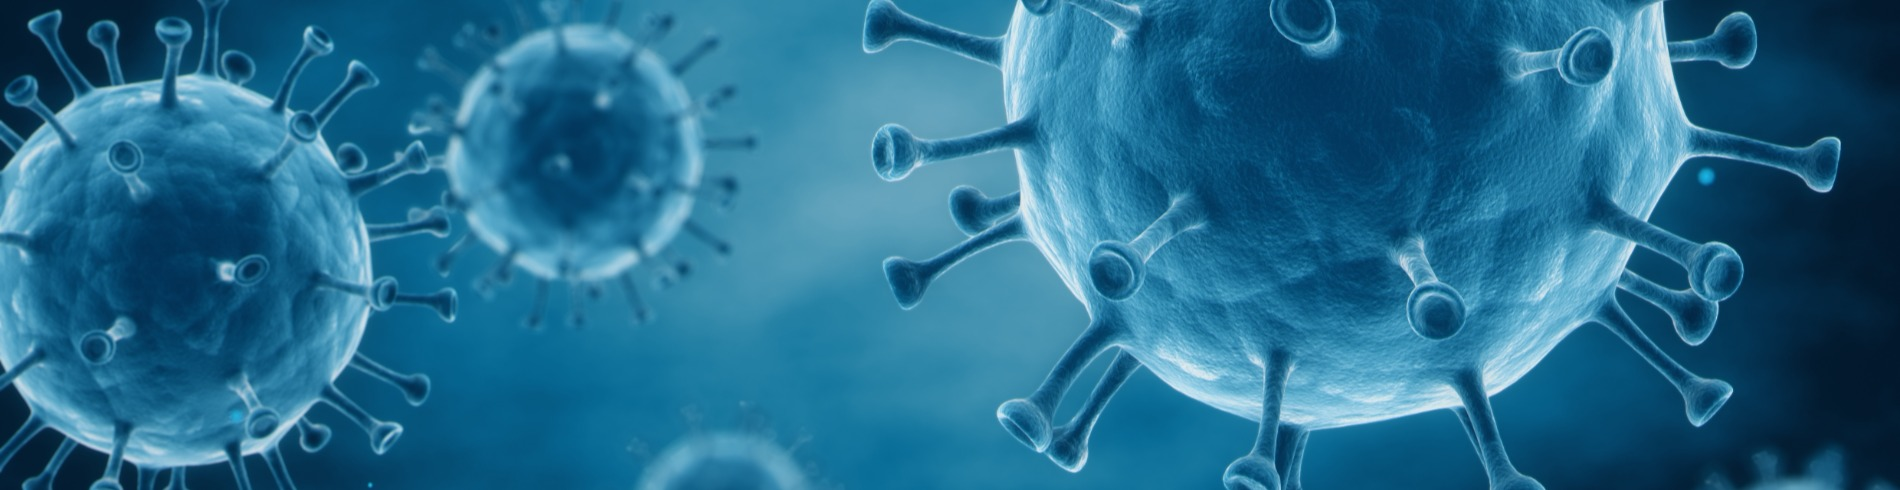

In [2]:
response = requests.get("https://corona.lmao.ninja/v2/countries")
data = response.json()
df = pd.DataFrame(data)
df = df.drop(['updated', 'countryInfo', 'todayCases', 'todayDeaths', 'todayRecovered', 'oneCasePerPeople',
              'oneDeathPerPeople', 'oneTestPerPeople', 'tests', 'testsPerOneMillion', 'continent', 'activePerOneMillion'],1)

C:\Users\lebam\AppData\Local\Temp\ipykernel_4528\1831193102.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['updated', 'countryInfo', 'todayCases', 'todayDeaths', 'todayRecovered', 'oneCasePerPeople',


In [3]:
response = requests.get("https://disease.sh/v3/covid-19/all")
df1 = response.json()
confirmed_total = df1['cases']
deaths_total = df1['deaths']
recovered_total = df1['recovered']
active = df1['active']

## Global Overview:

In [5]:
display(HTML("<div style = 'background-color: #504e4e; padding:20px '>" +
             "<span style='color: #fff; font-size:24px;'> Confirmed: "  + str(confirmed_total) +"</span>" +
             "<span style='color: red; font-size:24px;margin-left:50px;'> Deaths: " + str(deaths_total) + "</span>"+
             "<span style='color: lightgreen; font-size:24px; margin-left:50px;'> Recovered: " + str(recovered_total) + "</span>"+
             "<span style='color: #00CCFF; font-size:24px; margin-left:50px;'> Active: " + str(active) + "</span>"+
             "</div>")
       )

## Top worst - hit countries
### Enter the number of countries you want the data for: 

In [6]:
# Enter the number of worst hit coutries 
sorted_country_df = df.sort_values('cases', ascending = False)
def enter(n):
    try:
        n = int(n)
        return sorted_country_df.head(n)
    except:
        print('Định dạng đầu vào không hợp lệ!')
interact(enter, n='10')

interactive(children=(Text(value='10', description='n'), Output()), _dom_classes=('widget-interact',))

<function __main__.enter(n)>

### The bubble chart of worst hit countries:

In [7]:
def bubble_chart(n):
    fig = px.scatter(sorted_country_df.head(n), x = "country", y = "cases", size = "cases",
                     color = "country", hover_name = "country", size_max = 60, 
                     title = 'Top {} worst hit countries in terms of total comfirmed cases'.format(n))
    return fig.show()
interact(bubble_chart, n = widgets.IntSlider(min=5, max=40, value=10))

interactive(children=(IntSlider(value=10, description='n', max=40, min=5), Output()), _dom_classes=('widget-in…

<function __main__.bubble_chart(n)>

### The bar chart of worst affected countries:

In [8]:
def bar_chart(n):
    return px.bar(sorted_country_df.head(n), x = "country", y = "deaths",
    title = "Top {} worst affected countries in terms of total death cases".format(n),
    color_discrete_sequence = ["brown"], height = 500, width = 800)
interact(bar_chart, n = widgets.IntSlider(min=5, max=40, value=10))

interactive(children=(IntSlider(value=10, description='n', max=40, min=5), Output()), _dom_classes=('widget-in…

<function __main__.bar_chart(n)>

## COVID-19 cases by countries:
### Type the name of your country:

In [10]:
def cases_of_a_country(Country):
    if (Country == Country.lower()):
        print("The first letter of country name must be capitalized !")
    else:
        try:
            df2 = pd.read_json('https://api.covid19api.com/dayone/country/' + Country)
            plt.plot(df2['Date'],df2['Confirmed'],'b-', label = 'Confirmed')
            plt.plot(df2['Date'],df2['Deaths'],'r-', label = 'Deaths')
            plt.xlabel('Date',fontsize=16)
            plt.ylabel('Number of Confirmed Cases',fontsize=16)
            plt.title("Covid19 Cases of {}".format(Country), fontsize=18)
            plt.legend(prop={'size': 14});
            plt.xticks(rotation=45)
            plt.grid(True)
            plt.rcParams['figure.figsize'] = (12,7)
            df3 = df[df['country']==Country]
            display(df3)
        except:
            print('Please wait a minute...')
interact(cases_of_a_country, Country = 'Vietnam')

interactive(children=(Text(value='Vietnam', description='Country'), Output()), _dom_classes=('widget-interact'…

<function __main__.cases_of_a_country(Country)>

In [11]:
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [12]:
confirmed_df = confirmed_df.drop(['Province/State'],1).dropna()
death_df = death_df.drop(['Province/State'],1).dropna()

C:\Users\lebam\AppData\Local\Temp\ipykernel_4528\2384341310.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

C:\Users\lebam\AppData\Local\Temp\ipykernel_4528\2384341310.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



## COVID-19 World Map: 

In [13]:
world_map = folium.Map(location=[12,0], tiles="OpenStreetMap", zoom_start=2, max_zoom = 6, min_zoom = 2)


for i in range(0,len(confirmed_df)):
    folium.Circle(
        location = [confirmed_df.iloc[i]['Lat'], confirmed_df.iloc[i]['Long']],
        #fill=True,
        radius = float(np.log(confirmed_df.iloc[i,-1]+1.0001))*30000,
        color = 'red',
        fill_color = 'blue',
        tooltip = "<div style='margin: 0; background-color: black; color: white;'>"+
                    "<h4 style='text-align:center;font-weight: bold'>"+confirmed_df.iloc[i]['Country/Region'] + "</h4>"
                    "<hr style='margin:10px;color: white;'>"+
                    "<ul style='color: white;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                        "<li>Confirmed: "+str(confirmed_df.iloc[i,-1])+"</li>"+
                        "<li>Deaths:   "+str(death_df.iloc[i,-1])+"</li>"+
                        "<li>Death Rate: "+ str(np.round(death_df.iloc[i,-1]/(confirmed_df.iloc[i,-1]+1.0001)*100,2))+ "</li>"+
                    "</ul></div>",
        ).add_to(world_map)

world_map
